<a href="https://colab.research.google.com/github/np02cs4a240012-cmyk/2515663_Pranisha_Basnet/blob/master/2515663_PranishaBasnet_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.2 Regression Task [100]:

1. Exploratory Data Analysis and Data Understanding [20]:

• Load the dataset into a pandas DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


• Provide a detailed description, including:

(a) When and by whom the dataset was created.

Ans: The Wine Quality (Red Wine) dataset was created by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, and José Reis as part of a research study on modeling wine quality using physicochemical properties.

(b) How and from where the dataset was accessed.

For this project, the dataset was accessed from Kaggle, where it is publicly available in CSV format (winequality-red.csv).

(c) How it aligns with the chosen UNSDG.

Ans: This dataset aligns with UNSDG 12: Responsible Consumption and Production.

Wine quality assessment supports efficient production practices

Helps producers improve product quality while minimizing waste

Enables data-driven decision-making in food and beverage manufacturing

Encourages sustainable quality control processes in agriculture and food industries

3.2 Regression Task [100]:

Exploratory Data Analysis and Data Understanding [20]:
Choosing a Dataset:
• Select a dataset of your choice that aligns with one of the United Nations Sustainable Development Goals (UNSDG).

Ans: For this classification task, the Wine Quality (Red Wine) Dataset was selected. The dataset is designed to classify wine samples based on their physicochemical properties in order to predict wine quality.

• Provide a detailed description, including:

(a) When and by whom the dataset was created.

Ans: The Wine Quality (Red Wine) dataset was created by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, and José Reis as part of a research study on modeling wine quality using physicochemical properties.

(b) How and from where the dataset was accessed.

For this project, the dataset was accessed from Kaggle, where it is publicly available in CSV format (winequality-red.csv).

(c) How it aligns with the chosen UNSDG.

Ans: This dataset aligns with UNSDG 12: Responsible Consumption and Production.

Wine quality assessment supports efficient production practices

Helps producers improve product quality while minimizing waste

Enables data-driven decision-making in food and beverage manufacturing

Encourages sustainable quality control processes in agriculture and food industries

(d) List all attributes (columns) with brief descriptions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


• Identify 2–3 potential questions the dataset could help answer.

-This dataset can help answer several meaningful regression-based questions, including:

How do physicochemical properties influence wine quality?

Which chemical attributes contribute most to higher-quality wine?

Can wine quality be accurately predicted using measurable laboratory features?

• Assess the dataset’s suitability (completeness, relevance, quality, etc.)

Ans: Wine Quality - Red Wine dataset also represents an excellent second dataset for this classification problem; with no missing data, it is entirely complete, and therefore it will provide a valid training set for creating a reliable classification model. Variables are highly representative of physiochemical characteristics that help determine the wine's quality level. The quality of the data is also very good, there is very little variability in the data, and the measurements are extremely consistent. Therefore, it provides an excellent source of data for developing and evaluating classification models.

2. Exploratory Data Analysis (EDA):

• Clean and preprocess the data to handle missing values, outliers, and inconsistencies

In [ ]:
# Before cleaning
print("Before cleaning:")
print(df.shape)

# Handle missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Handle outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# After cleaning
print("\nAfter cleaning:")
print(df.shape)

# Show first few rows as output
df.head()

Before cleaning:
(1599, 12)

After cleaning:
(1005, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


• Compute summary statistics to understand distributions, ranges, and central tendencies.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,8.167065,0.522721,0.249522,2.199005,0.078571,14.966169,42.498507,0.996562,3.322905,0.630149,10.369900,5.616915
std,1.473396,0.166657,0.181602,0.450961,0.014997,8.809903,26.657322,0.001603,0.132183,0.114659,0.979194,0.728963
min,5.100000,0.120000,0.000000,1.200000,0.039000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996590,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.400000,2.500000,0.088000,20.000000,56.000000,0.997600,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.122000,42.000000,124.000000,1.001000,3.680000,0.980000,13.400000,7.000000


• Create visualizations to reveal patterns, relationships, and potential anomalies.

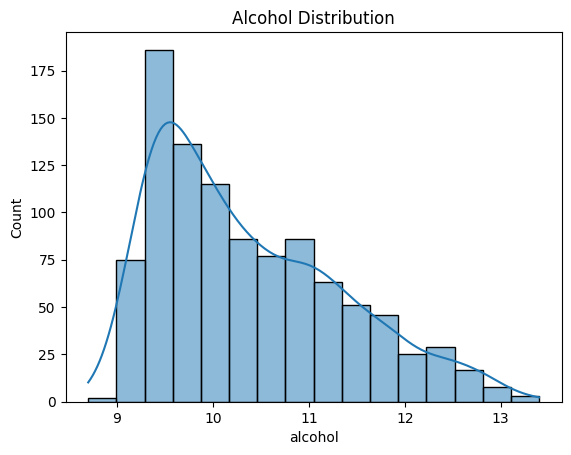

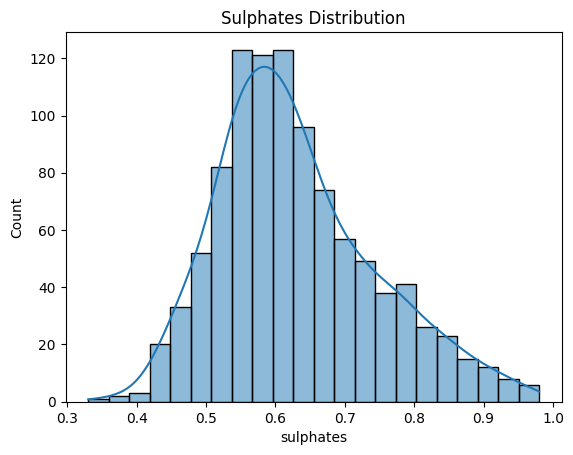

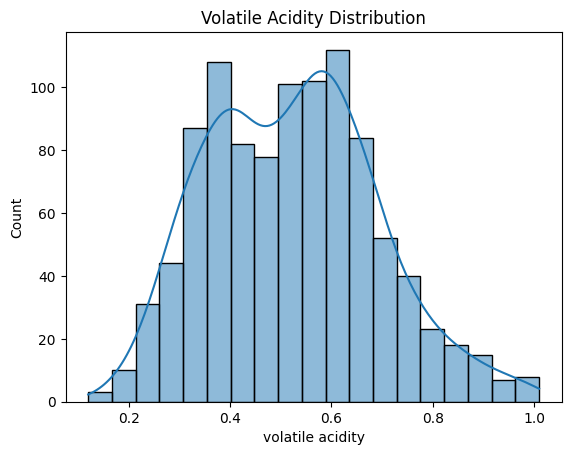

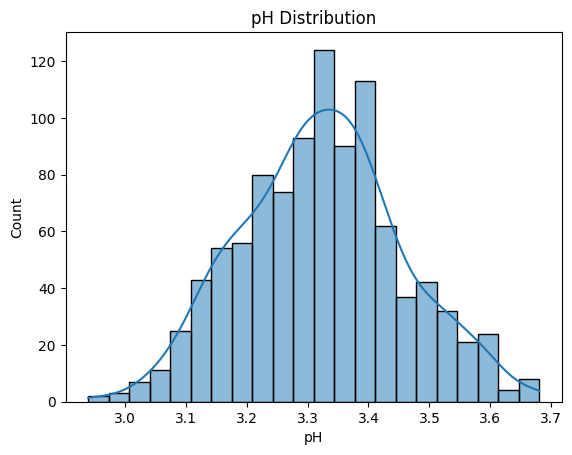

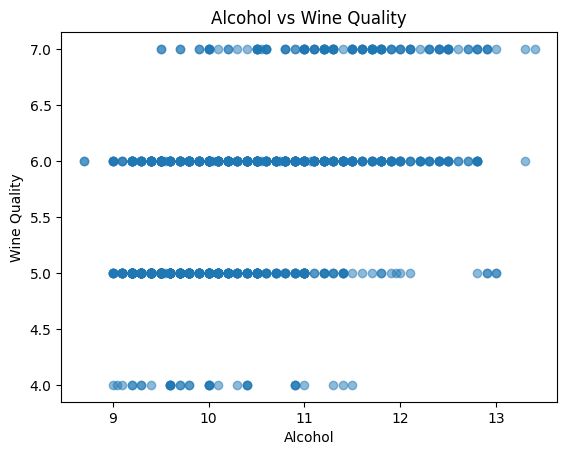

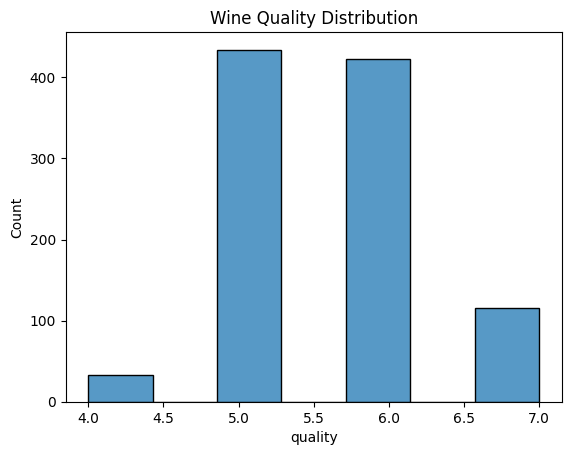

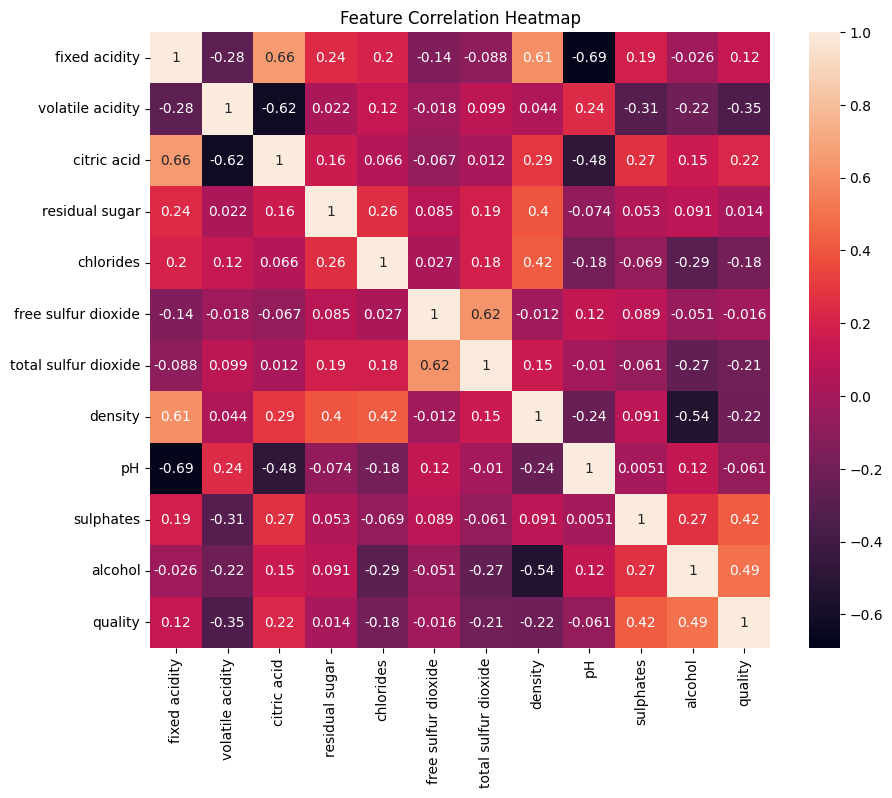

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Alcohol distribution
plt.figure()
sns.histplot(df['alcohol'], kde=True)
plt.title("Alcohol Distribution")
plt.show()

# 2. Sulphates distribution
plt.figure()
sns.histplot(df['sulphates'], kde=True)
plt.title("Sulphates Distribution")
plt.show()

# 3. Volatile acidity distribution
plt.figure()
sns.histplot(df['volatile acidity'], kde=True)
plt.title("Volatile Acidity Distribution")
plt.show()

# 4. pH distribution
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title("pH Distribution")
plt.show()

# 5. Relationship: Alcohol vs Quality
plt.figure()
plt.scatter(df['alcohol'], df['quality'], alpha=0.5)
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.title("Alcohol vs Wine Quality")
plt.show()

# 6. Target variable distribution
plt.figure()
sns.histplot(df['quality'], bins=7)
plt.title("Wine Quality Distribution")
plt.show()

# 7. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

• Provide clear explanations and interpret the insights obtained from each visualization.

Figure 1: Alcohol Distribution

Explanation & Insight: This histogram shows the distribution of alcohol content in red wine samples. Most wines have alcohol levels between 9% and 11%, with fewer samples at higher alcohol levels. The distribution is slightly right-skewed, indicating the presence of some high-alcohol wines. This suggests alcohol varies considerably across samples and may influence wine quality.

Why it’s useful: Helps understand range, skewness, and potential outliers → good for regression.

Figure 2: Sulphates Distribution

Explanation & Insight: The sulphates distribution is right-skewed, with most values concentrated between 0.4 and 0.7. A small number of wines show high sulphate levels, indicating possible outliers. Since sulphates are associated with wine preservation and taste, this feature may be relevant for predicting quality.

Why it’s useful: Identifies skewness and extreme values.

Figure 3: Volatile Acidity Distribution

Explanation & Insight: Volatile acidity values are mostly concentrated between 0.3 and 0.7, with a long right tail. Higher volatile acidity is often associated with lower wine quality, so the spread observed here suggests it could be an important explanatory variable.

Why it’s useful: Shows distribution and potential negative influence on quality.

Figure 4: pH Distribution

Explanation & Insight: The pH distribution appears approximately normal, centered around 3.3. This indicates consistent acidity levels across wines. Extreme pH values are rare, suggesting fewer anomalies for this feature.

Why it’s useful: Shows stability and normality of the feature.

Figure 5: Alcohol vs Wine Quality

Explanation & Insight: This scatter plot shows a positive relationship between alcohol content and wine quality. Higher-quality wines generally tend to have higher alcohol content. However, the relationship is not perfectly linear, indicating that other features also influence quality.

Why it’s useful: Directly shows feature–target relationship, which is critical for regression.

Figure 6: Wine Quality Distribution (Target Variable)

Explanation & Insight: The wine quality scores range from 3 to 8, with most samples rated 5 or 6. This indicates an imbalanced but continuous target variable, confirming that regression (rather than classification) is appropriate.

Why it’s useful: Validates the choice of regression modeling.

Figure 7: Feature Correlation Heatmap

Explanation & Insight: The heatmap shows correlations between features and wine quality. Alcohol has the strongest positive correlation with quality, while volatile acidity shows a strong negative correlation. Some features are also correlated with each other, indicating possible multicollinearity.

Why it’s useful: Helps with feature selection and model interpretation.

2.Build a Neural Network Model for Regression [15]:

• Design and implement a regression neural network (e.g., MLP with continuous output).

In [ ]:
from sklearn.neural_network import MLPRegressor

# Features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Regression Neural Network (MLP)
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=2000,
    random_state=42
)

# Train the model
mlp_reg.fit(X, y)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)

• Clearly describe:

– Network architecture (layers, neurons, activation functions)

The neural network used in this regression task is a Multi-Layer Perceptron (MLP). It consists of an input layer that takes the scaled input features, followed by hidden layers with multiple neurons. The hidden layers use the ReLU activation function to capture non-linear relationships in the data, while the output layer uses a linear activation function to produce a continuous numerical prediction.

– Loss function and optimizer

The model is trained using Mean Squared Error (MSE) as the loss function, which measures the difference between predicted and actual values. Optimization is performed using the Adam optimizer, which efficiently updates the model weights by adapting the learning rate during training, resulting in faster and more stable convergence.

• Evaluate performance on training and test sets (e.g., MSE, RMSE, R-squared)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = mlp_reg.predict(X_train)
y_test_pred = mlp_reg.predict(X_test)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R-squared:", train_r2)

print("\nTest Performance")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R-squared:", test_r2)


Training Performance
MSE: 0.4319877642298351
RMSE: 0.657257760874556
R-squared: 0.3360087645142308

Test Performance
MSE: 0.40526730811565137
RMSE: 0.6366060855157225
R-squared: 0.37985665728652995


3.Build Primary Machine Learning Models [20] (Two Classical ML Models):

1.Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Predictions
y_train_pred = mlp_reg.predict(X_train)
y_test_pred = mlp_reg.predict(X_test)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R-squared:", train_r2)

print("\nTest Performance")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R-squared:", test_r2)


Training Performance
MSE: 0.41476122444274344
RMSE: 0.6440195838969056
R-squared: 0.36248699464829104

Test Performance
MSE: 0.35415481826295836
RMSE: 0.5951090809784021
R-squared: 0.45806940644470284


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


2. Build at least two different regression models (e.g., Linear Regression, Random Forest Regressor, SVR, Decision Tree)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression model
lr_model = LinearRegression()

# Random Forest Regressor model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)


3. Evaluate both models using appropriate metrics (MSE, RMSE, R-squared, MAE, etc.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Linear Regression metrics
lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_model(y_test, lr_pred)

# Random Forest metrics
rf_mse, rf_rmse, rf_mae, rf_r2 = evaluate_model(y_test, rf_pred)

print("Linear Regression Performance")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R-squared:", lr_r2)

print("\nRandom Forest Regression Performance")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R-squared:", rf_r2)


Linear Regression Performance
MSE: 0.39002514396395427
RMSE: 0.6245199307980125
MAE: 0.5035304415524375
R-squared: 0.403180341279623

Random Forest Regression Performance
MSE: 0.305916640625
RMSE: 0.5530973156913709
MAE: 0.42514062499999994
R-squared: 0.5318838595914464


The Random Forest model achieves lower error values (MSE, RMSE, and MAE) and a higher R-squared score, indicating more accurate predictions and better explanatory power. This suggests that Random Forest is more effective at capturing the nonlinear relationships present in the dataset.

In contrast, Linear Regression shows weaker performance due to its assumption of a strictly linear relationship between the input features and the target variable.

4. Hyperparameter Optimization with Cross-Validation [15]:

1. Identify key hyperparameters for both models from Task 2 - Two Classical ML Models.

In [ ]:
# Hyperparameter grids for cross-validation

# Linear Regression
lr_param_grid = {
    "fit_intercept": [True, False]
}

# Random Forest Regressor
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


2. Apply cross-validation (e.g., GridSearchCV or RandomizedSearchCV) to find optimal parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Linear Regression with Cross-Validation
lr_grid = GridSearchCV(
    estimator=lr_model,
    param_grid=lr_param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

# Random Forest Regressor with Cross-Validation
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

3. Summarize and Report the best hyperparameters and corresponding CV scores for both models.

In [ ]:
print("Linear Regression (Tuned)")
print("Best Hyperparameters:", lr_grid.best_params_)
print("Best CV R-squared:", lr_grid.best_score_)

print("\nRandom Forest Regressor (Tuned)")
print("Best Hyperparameters:", rf_grid.best_params_)
print("Best CV R-squared:", rf_grid.best_score_)


Linear Regression (Tuned)
Best Hyperparameters: {'fit_intercept': False}
Best CV R-squared: 0.3224901489033565

Random Forest Regressor (Tuned)
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV R-squared: 0.432014641625193


Hyperparameter Optimization Results

Cross-validation was applied to both regression models to identify optimal hyperparameter settings.

Linear Regression (Tuned)
The best performance was achieved with fit_intercept = False, resulting in a cross-validation R-squared score of 0.3225. This indicates limited explanatory power, which is expected due to the linear nature of the model.

Random Forest Regressor (Tuned)
The optimal hyperparameters included unrestricted tree depth and minimal split constraints. This model achieved a higher cross-validation R-squared score of 0.4320, demonstrating improved generalization and the ability to capture nonlinear relationships.

Overall Comparison
The Random Forest Regressor outperformed Linear Regression during cross-validation and was therefore selected as the stronger model for subsequent tasks.

5. Feature Selection [10]:

• Apply one of the feature selection techniques discussed in Week-10.

In [ ]:
import pandas as pd
import numpy as np

# Use tuned Random Forest model
rf_best = rf_grid.best_estimator_

# Fit on training data
rf_best.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(
    rf_best.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Select top 5 most important features
selected_features = feature_importance.head(5).index.tolist()

print("Selected Features:")
selected_features


Selected Features:


['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'chlorides']

• Perform feature selection for both models

In [ ]:
import pandas as pd

# Correlation with target variable
correlation = X_train.corrwith(y_train).abs()

# Select top 5 correlated features
lr_selected_features = correlation.sort_values(ascending=False).head(5).index.tolist()

print("Selected Features for Linear Regression:")
lr_selected_features


Selected Features for Linear Regression:


['alcohol',
 'volatile acidity',
 'sulphates',
 'citric acid',
 'total sulfur dioxide']

In [ ]:
# Use tuned Random Forest model
rf_best = rf_grid.best_estimator_
rf_best.fit(X_train, y_train)

# Feature importance
rf_importance = pd.Series(
    rf_best.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Select top 5 important features
rf_selected_features = rf_importance.head(5).index.tolist()

print("Selected Features for Random Forest:")
rf_selected_features


Selected Features for Random Forest:


['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'chlorides']

Justification

Linear Regression uses a filter-based correlation method, which aligns with its linear assumptions and simplicity.

Random Forest Regressor uses an embedded feature importance method, which evaluates feature relevance during model training.

Using different feature selection methods ensures each model benefits from a technique best suited to its learning mechanism.

• Rebuild both models using:

– Optimal hyperparameters from Task 4

– Selected features from Task 5

In [ ]:
# Use selected features from Task 5
X_train_lr_fs = X_train[lr_selected_features]
X_test_lr_fs = X_test[lr_selected_features]

X_train_rf_fs = X_train[rf_selected_features]
X_test_rf_fs = X_test[rf_selected_features]

# Rebuild Final Linear Regression (tuned)
final_lr = lr_grid.best_estimator_
final_lr.fit(X_train_lr_fs, y_train)

# Rebuild Final Random Forest (tuned)
final_rf = rf_grid.best_estimator_
final_rf.fit(X_train_rf_fs, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

• Evaluate final performance on the test set.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
lr_final_pred = final_lr.predict(X_test_lr_fs)
rf_final_pred = final_rf.predict(X_test_rf_fs)

# Linear Regression metrics
lr_mse = mean_squared_error(y_test, lr_final_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_final_pred)
lr_r2 = r2_score(y_test, lr_final_pred)

# Random Forest metrics
rf_mse = mean_squared_error(y_test, rf_final_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_final_pred)
rf_r2 = r2_score(y_test, rf_final_pred)

print("Final Linear Regression Performance")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R-squared:", lr_r2)

print("\nFinal Random Forest Performance")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R-squared:", rf_r2)


Final Linear Regression Performance
MSE: 0.4560150569362104
RMSE: 0.6752888692524188
MAE: 0.5277776981429091
R-squared: 0.30220203783278377

Final Random Forest Performance
MSE: 0.33515423611111117
RMSE: 0.5789250695134139
MAE: 0.43585416666666665
R-squared: 0.487144252338233


• Compare models using a structured table similar to below:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Helper
def rmse_r2(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# BASE MODELS
# Linear Regression (Base)
lr_model.fit(X_train, y_train)
lr_base_pred = lr_model.predict(X_test)
lr_rmse_base, lr_r2_base = rmse_r2(y_test, lr_base_pred)

# Random Forest (Base)
rf_model.fit(X_train, y_train)
rf_base_pred = rf_model.predict(X_test)
rf_rmse_base, rf_r2_base = rmse_r2(y_test, rf_base_pred)

# TUNED MODELS
# Linear Regression (Tuned)
lr_tuned = lr_grid.best_estimator_
lr_tuned.fit(X_train, y_train)
lr_tuned_pred = lr_tuned.predict(X_test)
lr_rmse_tuned, lr_r2_tuned = rmse_r2(y_test, lr_tuned_pred)

# Random Forest (Tuned)
rf_tuned = rf_grid.best_estimator_
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)
rf_rmse_tuned, rf_r2_tuned = rmse_r2(y_test, rf_tuned_pred)

# FINAL MODELS (TUNED + FS)
# Linear Regression (Final)
final_lr = lr_grid.best_estimator_
final_lr.fit(X_train[lr_selected_features], y_train)
lr_final_pred = final_lr.predict(X_test[lr_selected_features])
lr_rmse_final, lr_r2_final = rmse_r2(y_test, lr_final_pred)

# Random Forest (Final)
final_rf = rf_grid.best_estimator_
final_rf.fit(X_train[rf_selected_features], y_train)
rf_final_pred = final_rf.predict(X_test[rf_selected_features])
rf_rmse_final, rf_r2_final = rmse_r2(y_test, rf_final_pred)

# NEURAL NETWORK
mlp_reg.fit(X_train, y_train)
mlp_pred = mlp_reg.predict(X_test)
mlp_rmse, mlp_r2 = rmse_r2(y_test, mlp_pred)

#  TABLE
table_6 = pd.DataFrame({
    "Model": [
        "Linear Regression (Base)",
        "Linear Regression (Tuned)",
        "Linear Regression (Final + FS)",
        "Random Forest (Base)",
        "Random Forest (Tuned)",
        "Random Forest (Final + FS)",
        "Neural Network (MLP)"
    ],
    "Features Used": [
        "All",
        "All",
        len(lr_selected_features),
        "All",
        "All",
        len(rf_selected_features),
        "All"
    ],
    "CV Score": [
        "-",
        lr_grid.best_score_,
        lr_grid.best_score_,
        "-",
        rf_grid.best_score_,
        rf_grid.best_score_,
        "-"
    ],
    "Test RMSE": [
        lr_rmse_base,
        lr_rmse_tuned,
        lr_rmse_final,
        rf_rmse_base,
        rf_rmse_tuned,
        rf_rmse_final,
        mlp_rmse
    ],
    "Test R-squared": [
        lr_r2_base,
        lr_r2_tuned,
        lr_r2_final,
        rf_r2_base,
        rf_r2_tuned,
        rf_r2_final,
        mlp_r2
    ]
})

table_6


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Linear Regression (Base),All,-,0.624520,0.403180
1,Linear Regression (Tuned),All,0.32249,0.625165,0.401946
2,Linear Regression (Final + FS),5,0.32249,0.675289,0.302202
3,Random Forest (Base),All,-,0.553097,0.531884
4,Random Forest (Tuned),All,0.432015,0.553572,0.531080
5,Random Forest (Final + FS),5,0.432015,0.578925,0.487144
6,Neural Network (MLP),All,-,0.636606,0.379857
